**CASE STUDY ON DIABETES**

*Introduction

According to W.H.O, Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. If not managed properly, it can lead to severe complications such as heart disease, kidney failure, and blindness. Over time, diabetes can damage blood vessels in the heart, eyes, kidneys and nerves.

People with diabetes have a higher risk of health problems including heart attack, stroke and kidney failure. Diabetes can cause permanent vision loss by damaging blood vessels in the eyes. Many people with diabetes develop problems with their feet from nerve damage and poor blood flow. This can cause foot ulcers and may lead to amputation.

Global Overview of Diabetes Distribution Prevalence (as of recent WHO/IDF reports) 537 million adults (20–79 years) were living with diabetes in 2021. Projected to rise to 643 million by 2030 and 783 million by 2045. Almost 1 in 10 adults globally has diabetes. 90–95% of all diabetes cases are Type 2 diabetes.

Region Prevalence Rate Notes Western Pacific ~12% High rates in China and Southeast Asia ~9% India has one of the largest diabetic populations Africa ~4.5% Lower rates but fastest growth due to urbanization Europe ~8% Aging population, obesity major drivers North America ~11% High obesity rates; well-documented cases Middle East/N. Africa ~13 High rates due to genetic and lifestyle factors.

This analysis report presents an exploratory data analysis (EDA) of a diabetes dataset. The main goal is to understand the key patterns in the data in order to prepare it for building a machine learning model that predicts whether a patient is likely to be diagnosed with diabetes (outcome)

**Domain Features**
 - 1) **Pregnancies:-** Some women may get a type of diabetes that only happens in pregnancy. This is called **gestational** diabetes. Pregnancy can change how a woman's body uses glucose. This can make diabetes worse, or lead to gestational diabetes.

- 2) **Glucose:-** People with diabetes have too much blood sugar because their body cannot move glucose into fat, liver, and muscle cells to be changed into and stored for energy.

- 3) **Blood Pressure:-** A person with diabetes is twice as likely to have high blood pressure as someone who does not have diabetes. Blood pressure should be below 140/80mmHg for people with diabetes.

- 4) **Skin Thickness:-** Skin thickening is frequently observed in patients with diabetes. Although different parts of the body can be involved, the hands and feet are most frequently involved.Diabetes can cause changes in the small blood vessels.

- 5) **Insulin:-** Insulin is a hormone your pancreas makes to lower blood glucose, or sugar. If you have diabetes, your pancreas either doesn't make enough insulin or your body doesn't respond well to it.

- 6) **BMI:-** Body mass index has a strong relationship to diabetes and insulin resistance.

- 8) **Age:-** The prevalence of both type 2 diabetes and prediabetes increases with advancing age.

**Section 2 - Reading the dataset and performing Exploratory Data Analysis on dataset**

In [1]:
# Importing of python liberties
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# uploading data set
df = pd.read_csv('diabetes.csv')

In [3]:
# Reading our dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Using the .info(), .describe(), and .shape function to undertand the dimension and structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The DataFrame is a data structure containing 768 entries (rows) and 9 columns, indexed from 0 to 767. The dataset is likely to include numerical and possibly categorical features related to dataset. The structure indicates that all columns are fully populated, with no missing (NaN) values based on non-null counts, making the dataset complete and ready for analysis. The formatting output shows dataset is well ready for exploratory data analysis and predictive modeling tasks

In [5]:
#Checking for rows and colounms in our dataset
df.shape

(768, 9)

In [6]:
df.size

6912

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#sChecking our dataset for any missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
# checking for duplicate
df.duplicated().sum()

np.int64(0)

In [11]:
df.Outcome.unique()

array([1, 0])

In [12]:
df.Outcome.value_counts() # 0 means no diabetes and 1 means diabetes

,count
Outcome,
0,500
1,268


In [13]:
diabetic = 268/768*100
non_diabetic = 500/768*100
print(diabetic)
print(non_diabetic)

34.89583333333333
65.10416666666666


**Insight**
1. *Out of 768 women's health records, 268 were diagnosed with diabetes, while 500 were not.*
2. *This indicates 34.9% women are diabetic and 65.1% women are non-diabetic.*

<Axes: xlabel='Pregnancies', ylabel='Count'>

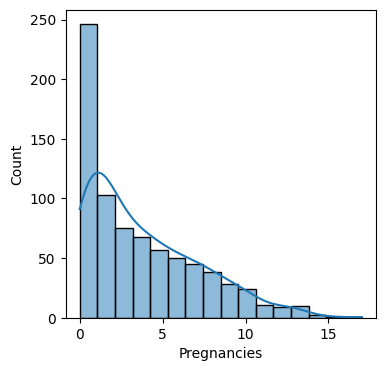

In [14]:
plt.figure(figsize=(4,4))
sns.histplot(x='Pregnancies', data=df, kde=True)

In [15]:
df.Pregnancies.skew()

np.float64(0.9016739791518588)

Insight

1. The Pregnancies column is positively skewed(most data on left).
2. Most women in dataset had fewer pregnancies.
3. Few had higher number of pregnancies making it a outlier.


<Axes: xlabel='Glucose', ylabel='Count'>

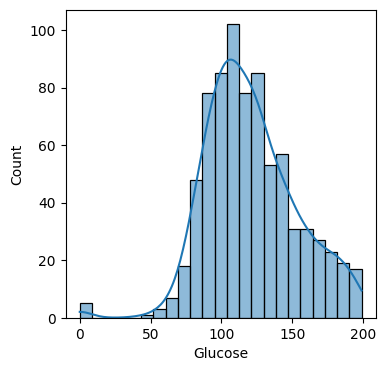

In [16]:
plt.figure(figsize=(4,4))
sns.histplot(x='Glucose', data=df, kde=True)

In [17]:
df.Glucose.skew()

np.float64(0.17375350179188992)

**Insight**
1. *The Glucose column has an approximate normal-like distribution.*
2. *Most data is around center.*

<Axes: xlabel='BloodPressure', ylabel='Count'>

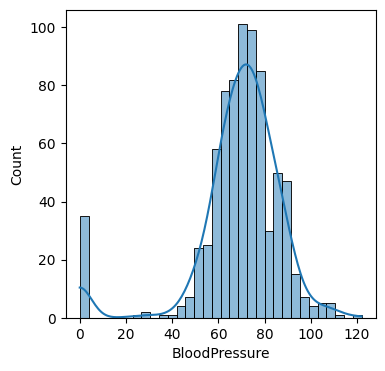

In [18]:
plt.figure(figsize=(4,4))
sns.histplot(x='BloodPressure', data=df, kde=True)

**Insight**
1. *The Blood Pressure column is negative skewed.*
2. *Many values are indicating 0 BP which is practically not possible so we need to treat 0 as missing values or incorrect data, replace it with np.median.*

<Axes: xlabel='SkinThickness', ylabel='Count'>

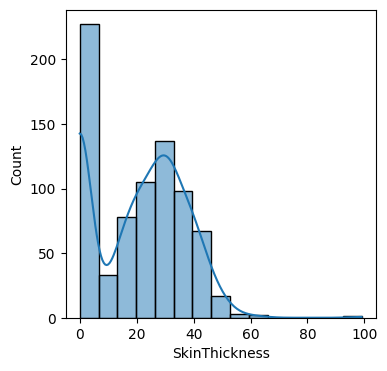

In [19]:
plt.figure(figsize=(4,4))
sns.histplot(x='SkinThickness', data=df, kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

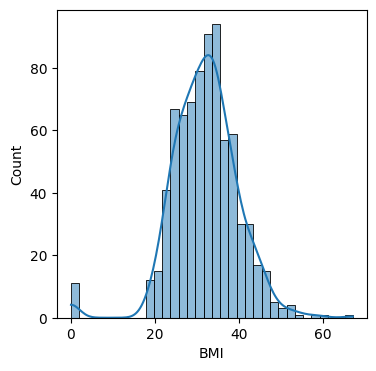

In [20]:
plt.figure(figsize=(4,4))
sns.histplot(x='BMI',data=df, kde=True)

In [21]:
(df['BloodPressure']==0).sum()

np.int64(35)

In [22]:
(df['Glucose']==0).sum()

np.int64(5)

In [23]:
(df['Insulin']==0).sum()

np.int64(374)

In [24]:
(df['BMI']==0).sum()

np.int64(11)

In [25]:
(df['SkinThickness']==0).sum()

np.int64(227)

In [26]:
# handling corrupted data, data which can't be zero will replaced by median.

df['BloodPressure'] = df['BloodPressure'].replace(0,np.median(df.BloodPressure))
df['Glucose'] = df['Glucose'].replace(0,np.median(df.Glucose))
df['Insulin'] = df['Insulin'].replace(0,np.median(df.Insulin))
df['SkinThickness'] = df['SkinThickness'].replace(0,np.median(df.SkinThickness))
df['BMI'] = df['BMI'].replace(0,np.median(df.BMI))

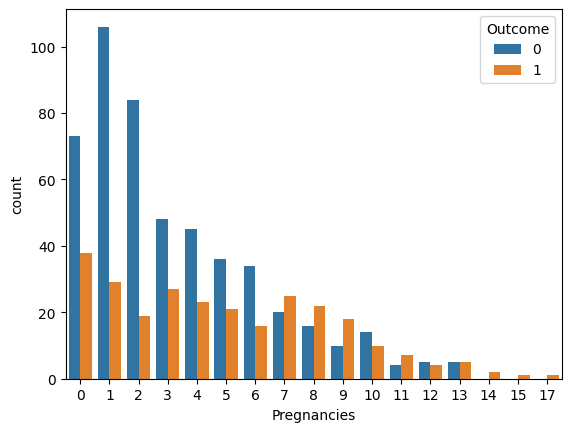

In [27]:
##Bivariate Analysis refers to plots between input variables and target variable.

## Analyzing how preganancies impact the patient with diabetes.
sns.countplot(x='Pregnancies',hue='Outcome',data=df)
plt.show()

<Figure size 400x400 with 0 Axes>

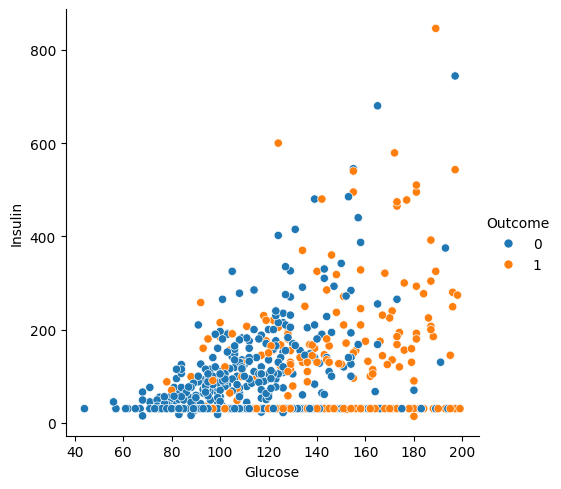

In [28]:
plt.figure(figsize=(4,4))
sns.relplot(x='Glucose', y='Insulin', data=df, hue='Outcome')

**Insight**
1. *From the graph( glucose vs insulin) we can observe a **positive correlation** — as glucose level increases, insulin level also tend to rise.*
2. *Women with higher glucose and insulin level are more likely to be diabetic whereas women with lower glucose and insulin level are non-diabetic.*
3. **We can say that both insulin and glucose level are major indicator for predicting diabetic outcome.**

In [29]:
df['Age'].nunique()

52

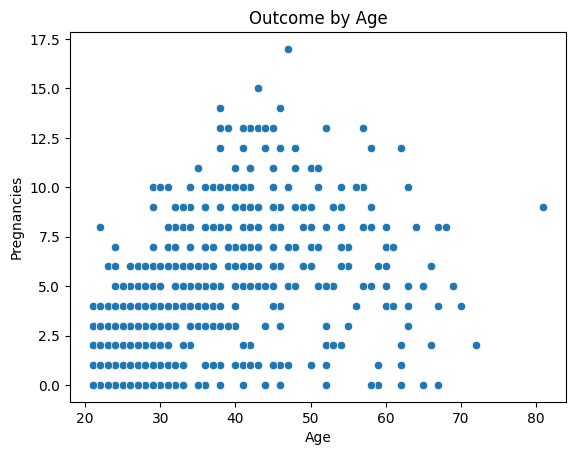

In [30]:
#visualise the outcome by age
sns.scatterplot(x='Age', y='Pregnancies', data=df)
plt.title('Outcome by Age')
plt.show()

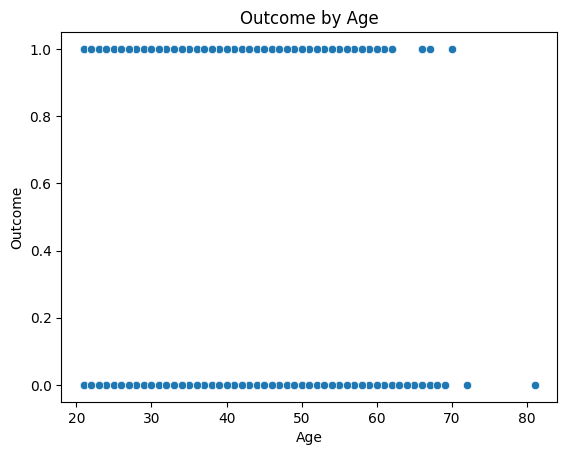

In [31]:
sns.scatterplot(x='Age', y='Outcome', data=df)
plt.title('Outcome by Age')
plt.show()

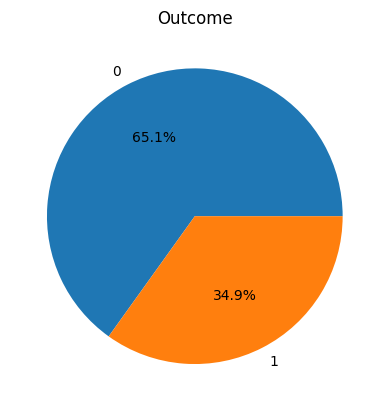

In [32]:
#make a pie chart with outcome
plt.pie(df['Outcome'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.title('Outcome')
plt.show()

<Axes: >

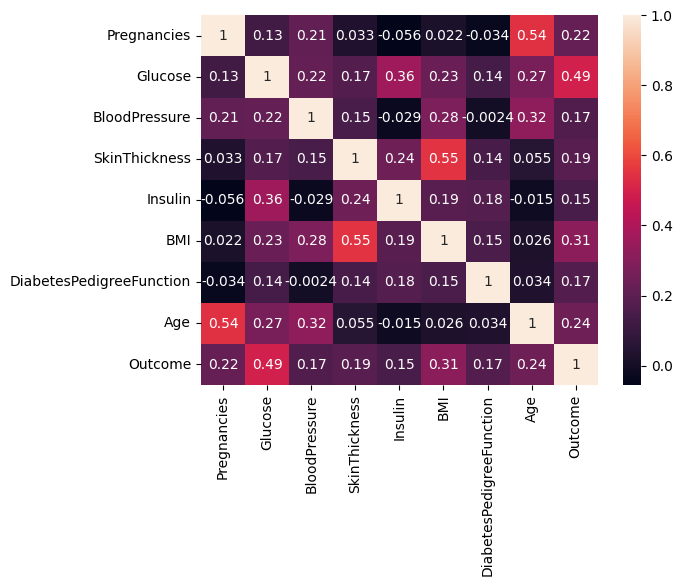

In [33]:
#visualise the correlation
sns.heatmap(df.corr(),annot=True)

<ipython-input-34-d5213288aa68>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preg_by_age_group = df.groupby('AgeGroup')['Pregnancies'].sum()
<ipython-input-34-d5213288aa68>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outcome_by_age_group = df.groupby('AgeGroup')['Outcome'].sum()


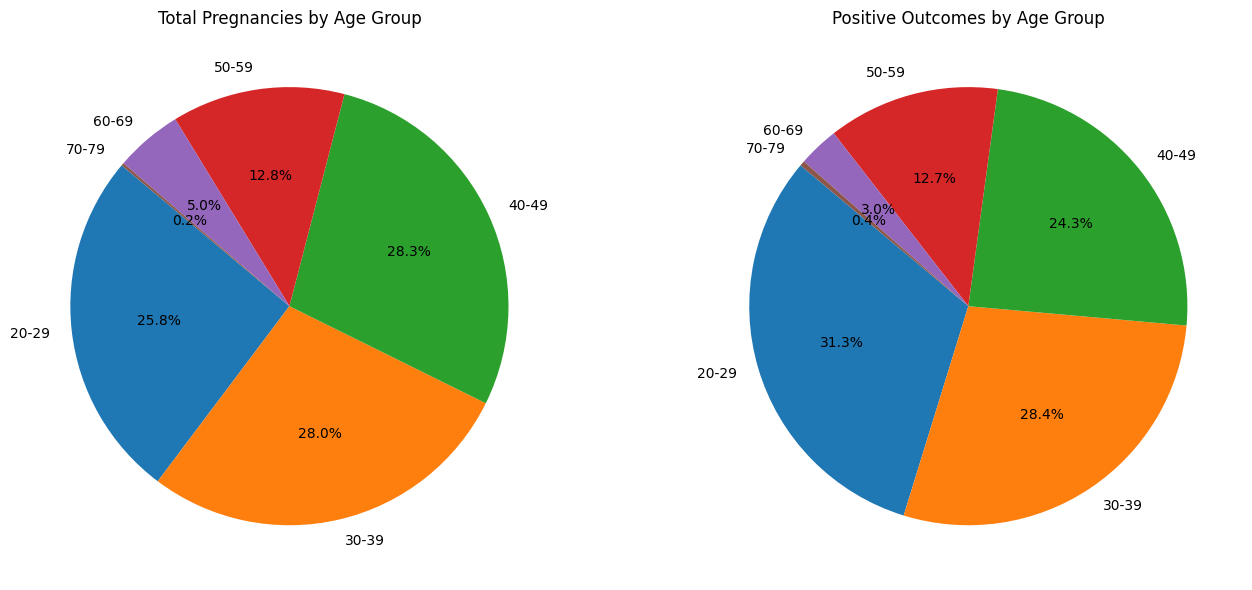

In [34]:
# Create age groups
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group data
preg_by_age_group = df.groupby('AgeGroup')['Pregnancies'].sum()
outcome_by_age_group = df.groupby('AgeGroup')['Outcome'].sum()

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total pregnancies pie chart
axes[0].pie(preg_by_age_group, labels=preg_by_age_group.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Total Pregnancies by Age Group')

# Positive outcomes pie chart
axes[1].pie(outcome_by_age_group, labels=outcome_by_age_group.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Positive Outcomes by Age Group')


plt.tight_layout()
plt.show()


Young women (20–29) have a higher-than-expected rate of diabetes relative to their share of total pregnancies, indicating a rising health concern in this age group.

Women aged 30–39 show a balanced proportion of pregnancies and diabetes outcomes, suggesting a typical risk profile.

Women aged 40–49 have a lower share of diabetes cases than expected, which may reflect better management or underreporting.

Older age groups (50+) have fewer pregnancies and relatively fewer diabetes cases, though the 70–79 group shows a slightly elevated diabetes rate.

Key Insight: Diabetes during pregnancy is increasingly affecting younger women, highlighting the need for early screening, lifestyle interventions, and targeted health education for the 20–29 age group.

In [35]:
#visualise the correlation
#sns.heatmap(df.corr(),annot=True)
df.drop('AgeGroup', inplace=True,axis=1)

In [36]:
#train test
from sklearn.model_selection import train_test_split
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,72,23,30.5,32.0,0.304,21
618,9,112,82,24,30.5,28.2,1.282,50
346,1,139,46,19,83.0,28.7,0.654,22
294,0,161,50,23,30.5,21.9,0.254,65
231,6,134,80,37,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26
106,1,96,122,23,30.5,22.4,0.207,27
270,10,101,86,37,30.5,45.6,1.136,38
435,0,141,72,23,30.5,42.4,0.205,29


In [38]:
y_train

,Outcome
60,0
618,1
346,0
294,0
231,1
...,...
71,0
106,0
270,1
435,1


In [39]:
#feature scaling of Glucose, Bmi, Insulin, Age, SkinThickness and BloodPressure
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[['Pregnancies', 'Glucose', 'BMI', 'Insulin', 'Age', 'SkinThickness','BloodPressure']] = sc.fit_transform(x[['Glucose', 'BMI', 'Insulin', 'Age', 'SkinThickness', 'Pregnancies', 'BloodPressure']])

In [40]:
# Model Creation.
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = LogReg.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#accuracy
accuracy = accuracy_score(y_test, y_pred.round())*100
print("Accuracy:", accuracy)

#confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
print("Confusion matrix:\n", cm)

#classification report
cr = classification_report(y_test, y_pred.round())
print("Classification report:\n", cr)

Accuracy: 81.16883116883116
Confusion matrix:
 [[88 11]
 [18 37]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

